In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
#%config InlineBackend.figure_formats = [‘retina’]
import seaborn as sns
import time
import warnings
#warnings.filterwarnings(“ignore”)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [11]:
df = pd.read_csv('C:/Users/ankussingh/Downloads/Churn_Dataset.csv')



In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan) 

In [40]:
display(df.iloc[488]) 

customerID                8372-JUXUI
gender                          Male
SeniorCitizen                      0
Partner                           No
Dependents                       Yes
tenure                             1
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 74.35
TotalCharges                   74.35
Churn                            Yes
Name: 489, dtype: object

In [18]:
df = df.dropna(how = 'any') 


In [21]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [25]:
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])

Rows     :  7032
Columns  :  21


In [24]:
df.shape

(7032, 21)

In [27]:
print ('\nFeatures : \n', df.columns.tolist())


Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [28]:
print ('\nMissing values :  ', df.isnull().sum().values.sum())


Missing values :   0


In [30]:
print ('\nUnique values :  \n', df.nunique())


Unique values :  
 customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


In [35]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
print(df.Churn.value_counts())

No     5163
Yes    1869
Name: Churn, dtype: int64


C:\Users\ankussingh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Churn')

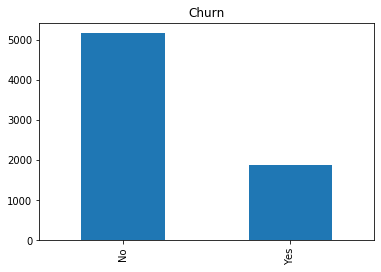

In [38]:
df['Churn'].value_counts().plot('bar').set_title('Churn')

In [43]:
# replace values for SeniorCitizen as a categorical feature
#df[‘SeniorCitizen’] = df[‘SeniorCitizen’].replace({1:’Yes’,0:’No’})
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [77]:
df2 = pd.get_dummies(data=df, columns= ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])

In [87]:
#df2 = pd.read_csv('df2.csv')
X, y = df2.drop('Churn_No',axis=1), df2[['Churn_No']]
## to find significant features using LassoCV (all X_scaled)
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
print('Use LassoCV to find the optimal ALPHA value for L1 regularization')
std = StandardScaler()
std.fit(X.values)
X_scaled = std.transform(X.values)
print('X_scaled', X_scaled.shape)
alphavec = 10**np.linspace(-3,3,200) 
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_scaled, y)
print('LASSO best alpha: ', lasso_model.alpha_ )
# display all coefficients in the model with optimal alpha
list(zip(X.columns, lasso_model.coef_))

Use LassoCV to find the optimal ALPHA value for L1 regularization
X_scaled (7032, 44)


C:\Users\ankussingh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LASSO best alpha:  0.001


[('gender_Female', -0.0),
 ('gender_Male', 0.0),
 ('SeniorCitizen_0', 0.0),
 ('SeniorCitizen_1', -0.0),
 ('Partner_No', -0.0),
 ('Partner_Yes', 0.0),
 ('Dependents_No', -0.0),
 ('Dependents_Yes', 0.0),
 ('PhoneService_No', 0.0),
 ('PhoneService_Yes', -0.0),
 ('MultipleLines_No', 0.0),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', -0.0),
 ('InternetService_DSL', 0.0),
 ('InternetService_Fiber optic', -0.0),
 ('InternetService_No', 0.0),
 ('OnlineSecurity_No', -0.0),
 ('OnlineSecurity_No internet service', 0.0),
 ('OnlineSecurity_Yes', 0.0),
 ('OnlineBackup_No', -0.0),
 ('OnlineBackup_No internet service', 0.0),
 ('OnlineBackup_Yes', 0.0),
 ('DeviceProtection_No', -0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('TechSupport_No', -0.0),
 ('TechSupport_No internet service', 0.0),
 ('TechSupport_Yes', 0.0),
 ('StreamingTV_No', -0.0),
 ('StreamingTV_No internet service', 0.0),
 ('StreamingTV_Yes', -0.0),
 ('StreamingMovies_No', -0.0

In [86]:
df2.drop(["customerID", "tenure", "MonthlyCharges", "TotalCharges"], axis = 1, inplace = True) 

C:\Users\ankussingh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Top Features derived by Random Forest')

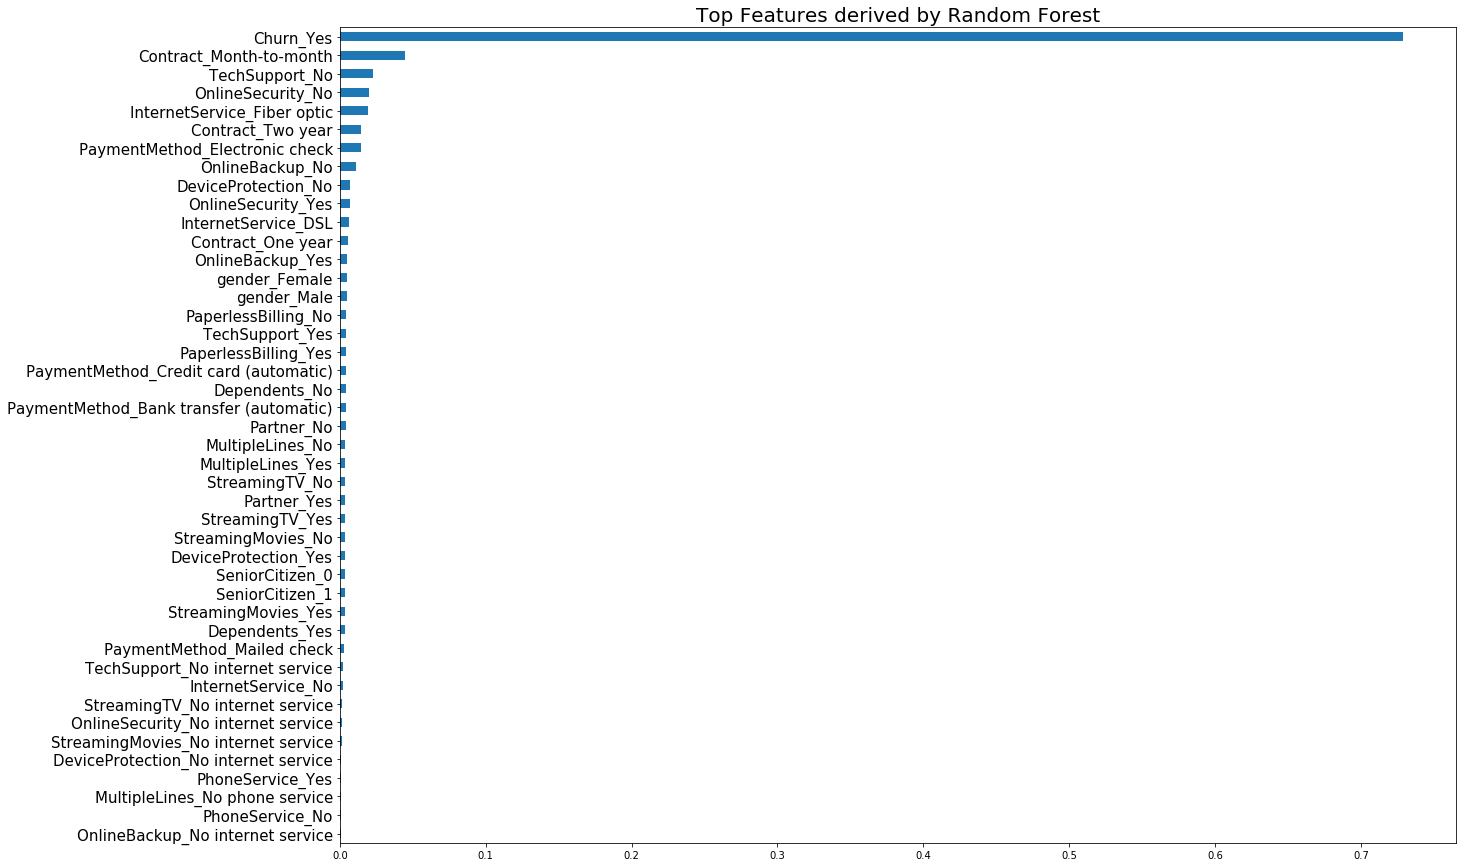

In [88]:
## To look for top features using Random Forest
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
model = rfc.fit(X, y)
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(47)  
   .plot(kind='barh', figsize=[20,15])
   .invert_yaxis())
plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

C:\Users\ankussingh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ankussingh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  if sys.path[0] == '':


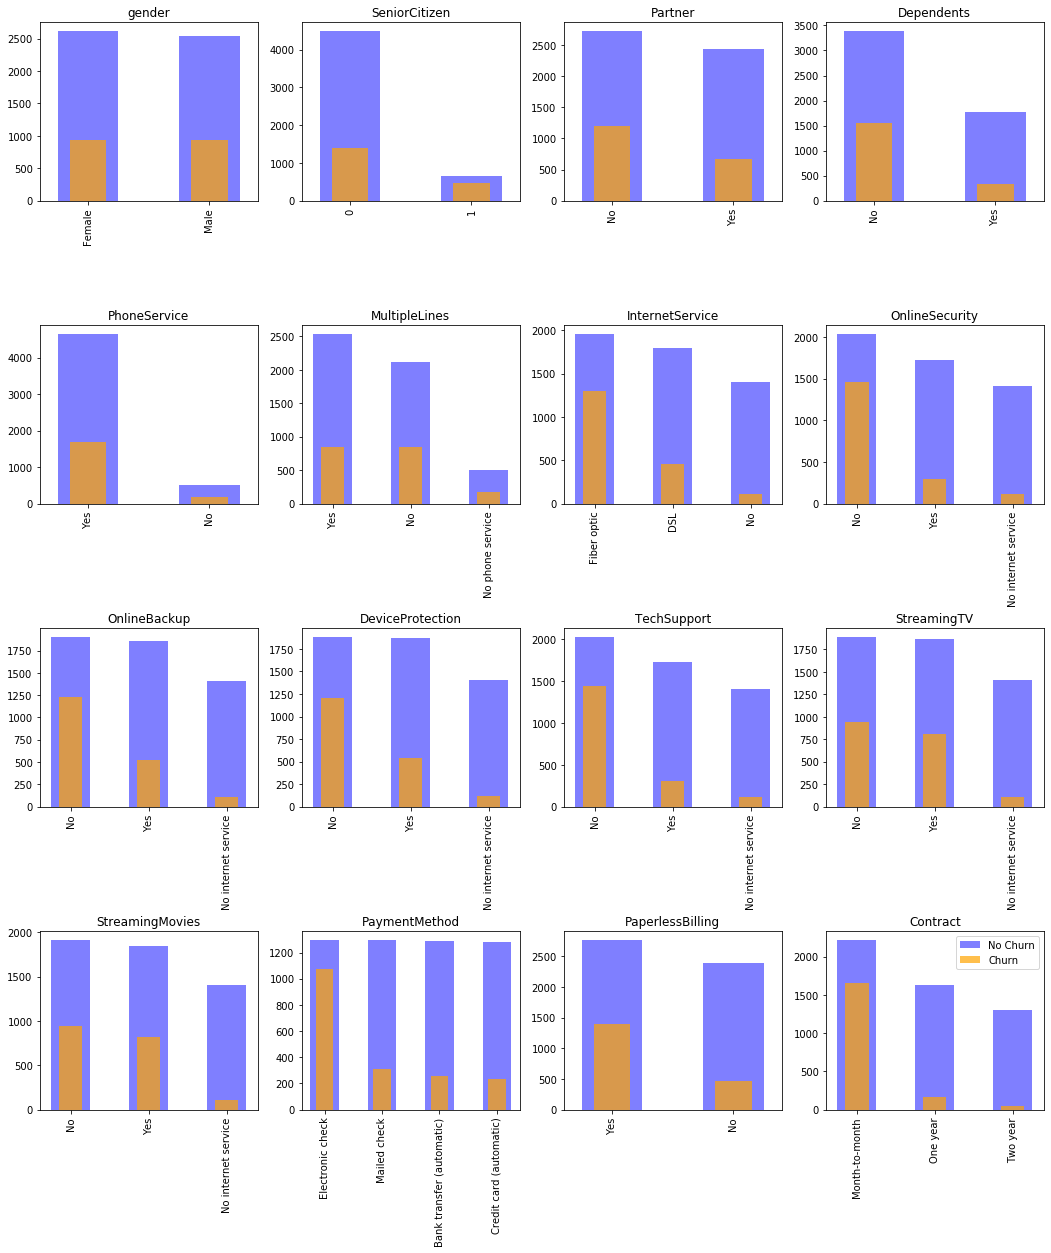

In [91]:
categorical_features = [ 'gender', 'SeniorCitizen', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
 'PaperlessBilling', 'Contract' ]
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
 if col == COLS - 1: row += 1
 col = i % COLS
 df[df.Churn=='No'][categorical_feature].value_counts().plot('bar', width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature)
 df[df.Churn=='Yes'][categorical_feature].value_counts().plot('bar', width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature)
 plt.legend(['No Churn', 'Churn'])
 fig.subplots_adjust(hspace=0.7)

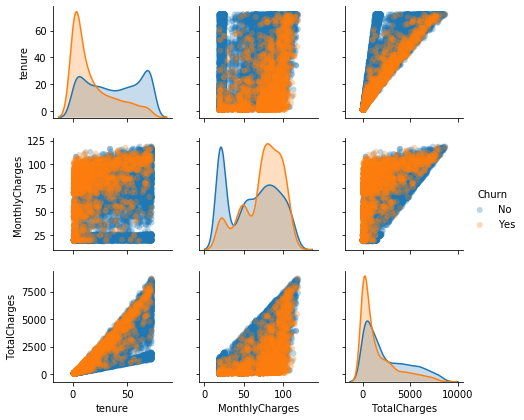

In [92]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

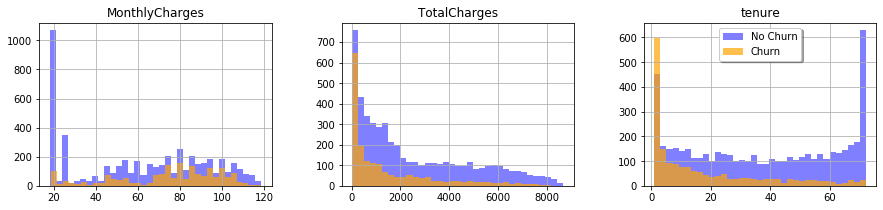

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[df.Churn == "No"][num_cols].hist(bins=35, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][num_cols].hist(bins=35, color="orange", alpha=0.7, ax=ax)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

In [99]:
# change MonthlyCharges to categorical column
def monthlycharges_split(df) : 
     if df['MonthlyCharges'] <= 30 :
        return '0–30'
     elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
        return '30–70'
     elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
        return '70–99'
     elif df['MonthlyCharges'] > 99 :
        return '99plus'
df['monthlycharges_group'] = df.apply(lambda df:monthlycharges_split(df), axis = 1)
# change TotalCharges to categorical column
def totalcharges_split(df) : 
     if df['TotalCharges'] <= 2000 :
        return '0–2k'
     elif (df['TotalCharges'] > 2000) & (df['TotalCharges'] <= 4000 ):
        return '2k-4k'
     elif (df['TotalCharges'] > 4000) & (df['TotalCharges'] <= 6000) :
        return '4k-6k'
     elif df['TotalCharges'] > 6000 :
        return '6kplus'
df['totalcharges_group'] = df.apply(lambda df:totalcharges_split(df), axis = 1)
# change Tenure to categorical column
def tenure_split(df) : 
     if df['tenure'] <= 20 :
        return '0–20'
     elif (df['tenure'] > 20) & (df['tenure'] <= 40 ):
        return '20–40'
     elif (df['tenure'] > 40) & (df['tenure'] <= 60) :
        return '40–60'
     elif df['tenure'] > 60 :
        return '60plus'
df['tenure_group'] = df.apply(lambda df:tenure_split(df), axis = 1)

In [100]:
# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=71)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)
def model_report(model_name, model):
     print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
         model.fit(X_train, y_train)
 optimal_th = 0.5 # start with default threshold value
 
 for i in range(0,3):
 score_list = []
 print('\nLooping decimal place', i+1) 
 th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
 for th in th_list[i]:
 y_pred = (model.predict_proba(X_test)[:,1] >= th)
 f1scor = f1_score(y_test, y_pred)
 score_list.append(f1scor)
 print('{:.3f}->{:.4f}'.format(th, f1scor), end=', ') 
 optimal_th = float(th_list[i][score_list.index(max(score_list))])
 print('optimal F1 score = {:.4f}'.format(max(score_list)))
 print('optimal threshold = {:.3f}'.format(optimal_th))
 print(model_name, 'accuracy score is')
 print('Training: {:.2f}%'.format(100*model.score(X_train, y_train))) # score uses accuracy
 print('Test set: {:.2f}%'.format(100*model.score(X_test, y_test)))
 y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
 print('\nAdjust threshold to 0.25:')
 print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}'.format(
 precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
 print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
 y_pred = model.predict(X_test)
 print('\nDefault threshold of 0.50:')
 print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}'.format(
 precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
 print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
 y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
 print('\nAdjust threshold to 0.75:')
 print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}'.format(
 precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
 print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
 y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
 print('\nOptimal threshold {:.3f}'.format(optimal_th))
 print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}'.format(
 precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
 print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
 
 global model_f1, model_auc, model_ll, model_roc_auc
 model_f1 = f1_score(y_test, y_pred)
 y_pred = model.predict_proba(X_test)
 model_ll = log_loss(y_test, y_pred)
 print(model_name, 'Log-loss: {:.4f}'.format(model_ll))
 y_pred = model.predict(X_test)
 model_roc_auc = roc_auc_score(y_test, y_pred)
 print(model_name, 'roc_auc_score: {:.4f}'.format(model_roc_auc)) 
 y_pred = model.predict_proba(X_test)[:,1]
 fpr, tpr, thresholds = roc_curve(y_test, y_pred)
 model_auc = auc(fpr, tpr)
 print(model_name, 'AUC: {:.4f}'.format(model_auc))
 # plot the ROC curve
 plt.figure(figsize = [6,6])
 plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
 plt.plot([0, 1], [0, 1],'r — ')
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.0])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver Operating Characteristic')
 plt.legend(loc=”lower right”)
 # plt.savefig('roc_auc_score')
 plt.show()
 
 return
# initialise lists to collect the results to plot later
model_list = []
f1_list = []
auc_list = []
ll_list = []
roc_auc_list = []
time_list = []

IndentationError: expected an indented block (<ipython-input-100-e9c9b96e3893>, line 14)